# Explorative Analysis of Properties in Nigeria

I import the necessary libraries for the analysis

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import selenium

Then I scrape the data containing nature of the property, type of property, date posted, date updated, address of property, number of beds, baths and toilets.
N.B. Property in this case include lands and houses.

In [22]:
property_ng = {}
property_no = 0

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36",}

for page in range(0,25):
    url = "https://www.propertypro.ng/property-for-sale?search=&auto=&type=&bedroom=&min_price=&max_price={page}".format(page=page)
    response = requests.get(url, headers=headers)
    data = response.text
    soup = BeautifulSoup(data, 'html.parser')
    properties = soup.find_all('div',{'class':'single-room-sale listings-property'})
    for prop in properties:

        date_posted = prop.find('h5', class_=False, id=False).text.replace(',', ' ')
        date_updated = date_posted.split()[1:4]
        nature_of_property = prop.find('h4', {'class':"listings-property-title"}).text
        type_of_property = prop.find('h3', {'class':"listings-property-title2"}).text
        address_of_property = prop.find('h4', class_=False, id=False).text
        no_Beds_Baths_Toilets = prop.find('div', {'class':"fur-areea"})
        no_of_beds_baths_toilets = no_Beds_Baths_Toilets.text.replace('\n',' ') if no_Beds_Baths_Toilets else "Not Available"

        property_no+=1
        property_ng[property_no] = [date_posted,date_updated,nature_of_property,type_of_property,address_of_property,no_of_beds_baths_toilets]
    #print('Total properties:', property_no)
    property_df1 = pd.DataFrame.from_dict(property_ng, orient = 'index', columns = ['Date_posted','Date_updated','Nature_of_property','Type_of_property','Property_Location','No_of_beds_baths_toilets'])

In [21]:
# Getting the top rows of the data
property_df1.head()

In [20]:
# Saving to CSV
property_df1.to_csv('Property_data.csv')

# Reading the property data

In [2]:
property_df1 = pd.read_csv('Property_data.csv')

print(property_df1.head())

   Unnamed: 0                                Date_posted  \
0           1    Updated 28 Aug 2022  Added 17 May 2022    
1           2    Updated 29 Aug 2022  Added 05 Aug 2022    
2           3    Updated 22 Aug 2022  Added 11 Apr 2022    
3           4    Updated 28 Jul 2022  Added 09 Nov 2021    
4           5    Updated 28 Jul 2022  Added 14 Jan 2022    

            Date_updated        Nature_of_property  \
0  ['28', 'Aug', '2022']  4 BEDROOM HOUSE FOR SALE   
1  ['29', 'Aug', '2022']             LAND FOR SALE   
2  ['22', 'Aug', '2022']             LAND FOR SALE   
3  ['28', 'Jul', '2022']             LAND FOR SALE   
4  ['28', 'Jul', '2022']             LAND FOR SALE   

                          Type_of_property  \
0  Spacious 4 Bedroom Semi Detached Duplex   
1                      2400sqm Land For Jv   
2    Joint Venture Land Measuring 21 Plots   
3                   Land For Sale In Lekki   
4                8000 Sqm Of Joint Venture   

                                   Pr

In [3]:
property_df1.columns

Index(['Unnamed: 0', 'Date_posted', 'Date_updated', 'Nature_of_property',
       'Type_of_property', 'Property_Location', 'No_of_beds_baths_toilets'],
      dtype='object')

# Data Cleaning process

1. Dropping redundant column(s)
2. Column Separation
3. Identifying and removing the null values

I shall drop some columns that are not essential to our analysis

In [4]:
property_df2 = property_df1.drop(columns=['Date_updated','Unnamed: 0'])

# Confirming deletion of the columns

property_df2.columns

Index(['Date_posted', 'Nature_of_property', 'Type_of_property',
       'Property_Location', 'No_of_beds_baths_toilets'],
      dtype='object')

I shall separate the columns below:
1. 'Date_posted' into 'Date added' and 'Date updated'
2. 'No_of_beds_baths_toilets' into 'No_of_beds', 'No_of_baths' and 'No_of_toilets'

# 1.

In [5]:
# I removed the values that have 'added' behind them, assigning them to a new column 'Date_updated'
property_df2['Date_updated'] = property_df2['Date_posted'].apply(lambda row:row[:row.find('Added')])

# I remove the string 'Updated' in the new column
property_df2['Date_updated'] = property_df2['Date_updated'].str.strip('Updated ')

In [6]:
# I create a new list 'Date_added' to put it the values

Date_added = []

for i in property_df2['Date_posted']:
    if 'Added' in i:
        ans = i.split('Added')[1]
    else:
        answer = i
    Date_added.append(ans)
    
# I convert the list into a new column 'Date_added' in the data

property_df2['Date_added'] = Date_added

In [7]:
# Confirming the inclusion of the new columns in the data
property_df2.columns

Index(['Date_posted', 'Nature_of_property', 'Type_of_property',
       'Property_Location', 'No_of_beds_baths_toilets', 'Date_updated',
       'Date_added'],
      dtype='object')

Since the column 'Date_posted' won't be needed again, I simply drop it.

In [8]:
property_df2 = property_df2.drop(columns='Date_posted')

property_df2

,Nature_of_property,Type_of_property,Property_Location,No_of_beds_baths_toilets,Date_updated,Date_added
0,4 BEDROOM HOUSE FOR SALE,Spacious 4 Bedroom Semi Detached Duplex,Second Tollgate Lekki Lagos,4 beds 4 baths 5 Toilets,28 Aug 2022,17 May 2022
1,LAND FOR SALE,2400sqm Land For Jv,Ikate Lekki Lagos,0 beds 0 baths 0 Toilets,29 Aug 2022,05 Aug 2022
2,LAND FOR SALE,Joint Venture Land Measuring 21 Plots,"Chevron Cooperative Estate, Alpha Beach New Ro...",beds baths Toilets,22 Aug 2022,11 Apr 2022
3,LAND FOR SALE,Land For Sale In Lekki,Lekki Lagos,0 beds 0 baths 0 Toilets,28 Jul 2022,09 Nov 2021
4,LAND FOR SALE,8000 Sqm Of Joint Venture,Lekki Phase 1 Lekki Lagos,0 beds 0 baths 0 Toilets,28 Jul 2022,14 Jan 2022
...,...,...,...,...,...,...
481,LAND FOR SALE,Land,Caritas Luxury Homes Okun Iseki Ibeju Lekki Fr...,0 beds 0 baths 0 Toilets,11 Apr 2022,30 Jan 2022
482,LAND FOR SALE,Land,Ibeju Lekki Lagos,0 beds 0 baths 0 Toilets,,09 Mar 2022
483,6 BEDROOM HOUSE FOR SALE,6 Bedroom Fully Detached,Banana Island Ikoyi Lagos,6 beds 7 baths 6 Toilets,,07 Mar 2022
484,LAND FOR SALE,Land,Epe Lagos,0 beds 0 baths 0 Toilets,,24 Feb 2022


# 2.

In [9]:
# I create a new list 'No_of_beds' to put in the values

No_of_beds = []
for i in property_df2['No_of_beds_baths_toilets']:
    if 'beds' in i:
        ans = i.split('beds')[0]
    else:
        ans = i
    No_of_beds.append(ans)
    
# I convert the list into a new column 'No_of_beds' in the data

property_df2['No_of_beds'] = No_of_beds

In [10]:
# I create a new list 'No_of_baths' to put in the values

No_of_baths = []
for i in property_df2['No_of_beds_baths_toilets']:
    if 'baths' in i:
        ans = i.split('baths')[0]
    else:
        ans = i
    No_of_baths.append(ans)
    
# Since the result above still contains the string 'beds' and its values, i have to remove them

No_of_bath = []
for i in No_of_baths:
    if 'beds' in i:
        ans = i.split('beds')[1]
    else:
        ans = i
    No_of_bath.append(ans)
    
# I convert the list into a new column 'No_of_baths' in the data

property_df2['No_of_baths'] = No_of_bath

In [11]:
# I create a new list 'No_of_toilets' to put in the values

No_of_toilets = []
for i in property_df2['No_of_beds_baths_toilets']:
    if 'Toilets' in i:
        ans = i.split('Toilets')[0]
    else:
        ans = i
    No_of_toilets.append(ans)
    
# Since the result above still contains the string 'beds', 'baths' and their values, i have to remove them

No_of_toilet = []
for i in No_of_toilets:
    if 'beds' in i:
        ans = i.split('beds')[1]
    else:
        ans = i
    No_of_toilet.append(ans)
    
No_of_Toilet = []
for i in No_of_toilet:
    if 'baths' in i:
        ans = i.split('baths')[1]
    else:
        ans = i
    No_of_Toilet.append(ans)
    
# I convert the list into a new column 'No_of_toilets' in the data

property_df2['No_of_toilets'] = No_of_Toilet

In [12]:
# I delete the column 'No_of_beds_baths_toilets' in the data

property_df3 = property_df2.drop(columns=['No_of_beds_baths_toilets'])

# 3.

In [66]:
# Identifying null values in the dataset

property_df3.isnull().sum()

Nature_of_property    0
Type_of_property      0
Property_Location     0
Date_updated          0
Date_added            0
No_of_beds            0
No_of_baths           0
No_of_toilets         0
dtype: int64

In [15]:
# Saving the data

property_df3.to_csv("Cleaned_Property.csv")

# Data Analysis process

In [67]:
# Checking duplicate values

property_df3.duplicated().sum()

455

In [68]:
# Describing the data

property_df3.describe()

,Nature_of_property,Type_of_property,Property_Location,Date_updated,Date_added,No_of_beds,No_of_baths,No_of_toilets
count,486,486,486,486,486,486,486,486
unique,7,20,25,12,28,6,6,6
top,LAND FOR SALE,Land,Ikate Lekki Lagos,28 Jul 2022,15 Jul 2021,0,0,0
freq,381,151,52,165,46,355,355,355


In [69]:
# Identifying unique values in each column of the data

property_df3.nunique()

Nature_of_property     7
Type_of_property      20
Property_Location     25
Date_updated          12
Date_added            28
No_of_beds             6
No_of_baths            6
No_of_toilets          6
dtype: int64

In [46]:
# Collecting necessary info about each column of the data

property_df3.info()

# Since I indentified the columns 'No_of_beds','No_of_baths' and 'No_of_toilets' are object type, 
# I decide to change them to int type 

convert_dict = {
    'No_of_beds':int,
    'No_of_baths':int,
    'No_of_toilets':int
    }

property_df3[['No_of_beds','No_of_baths','No_of_toilets']] = property_df3[['No_of_beds','No_of_baths','No_of_toilets']].astype(convert_dict)

# I tried the format above, I got an error.

In [47]:
# I tried another format below, still same error.

property_df3['No_of_beds'] = property_df3['No_of_beds'].astype('int64')

In [88]:
property_df4 = property_df3.copy()

In [71]:
property_df4['No_of_beds'] = pd.to_numeric(property_df4['No_of_beds'], errors='coerce')

In [73]:
property_df4['No_of_beds'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 486 entries, 0 to 485
Series name: No_of_beds
Non-Null Count  Dtype  
--------------  -----  
434 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [74]:
property_df4['No_of_beds'] = property_df4['No_of_beds'].fillna(0)

In [75]:
property_df4['No_of_beds'].isnull().sum()

0

## Which property has the highest number of bathrooms, beds and toilets?

Grouping the nature of property by number of bathrooms, beds and toilets

In [70]:
baths = property_df3.groupby("Nature_of_property", as_index=False).agg({"No_of_baths":"sum"})
baths

,Nature_of_property,No_of_baths
0,10 BEDROOM COMMERCIAL PROPERTY FOR SALE,10 10 10 10 10 10 10 10 10
1,3 BEDROOM FLAT / APARTMENT FOR SALE,3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...
2,4 BEDROOM HOUSE FOR SALE,4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 ...
3,6 BEDROOM HOUSE FOR SALE,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...
4,COMMERCIAL PROPERTY FOR SALE,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
5,HOUSE FOR SALE,
6,LAND FOR SALE,0 0 0 0 0 0 0 0 0 0 0 0 0...


In [82]:
beds = property_df4.groupby("Nature_of_property", as_index=False).agg({"No_of_beds":"sum"})
beds

,Nature_of_property,No_of_beds
0,10 BEDROOM COMMERCIAL PROPERTY FOR SALE,90.0
1,3 BEDROOM FLAT / APARTMENT FOR SALE,66.0
2,4 BEDROOM HOUSE FOR SALE,100.0
3,6 BEDROOM HOUSE FOR SALE,138.0
4,COMMERCIAL PROPERTY FOR SALE,0.0
5,HOUSE FOR SALE,0.0
6,LAND FOR SALE,0.0


In [72]:
toilets = property_df3.groupby("Nature_of_property", as_index=False).agg({"No_of_toilets":"sum"})
toilets

,Nature_of_property,No_of_toilets
0,10 BEDROOM COMMERCIAL PROPERTY FOR SALE,10 10 10 10 10 10 10 10 10
1,3 BEDROOM FLAT / APARTMENT FOR SALE,3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...
2,4 BEDROOM HOUSE FOR SALE,5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 ...
3,6 BEDROOM HOUSE FOR SALE,6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 ...
4,COMMERCIAL PROPERTY FOR SALE,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
5,HOUSE FOR SALE,
6,LAND FOR SALE,0 0 0 0 0 0 0 0 0 0 0 0 0...


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

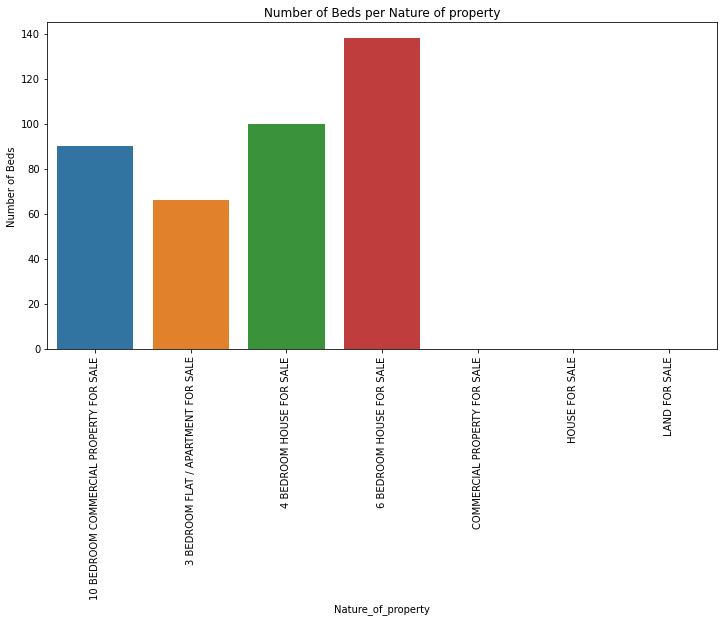

<Figure size 432x288 with 0 Axes>

In [84]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = beds, x = "Nature_of_property", y = "No_of_beds", ax = ax)
g.set(title = "Number of Beds per Nature of property",
     xlabel = "Nature_of_property", 
     ylabel = "Number of Beds")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

In [85]:
property_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nature_of_property  486 non-null    object 
 1   Type_of_property    486 non-null    object 
 2   Property_Location   486 non-null    object 
 3   Date_updated        486 non-null    object 
 4   Date_added          486 non-null    object 
 5   No_of_beds          486 non-null    float64
 6   No_of_baths         486 non-null    object 
 7   No_of_toilets       486 non-null    object 
dtypes: float64(1), object(7)
memory usage: 30.5+ KB


In [86]:
#property_df4['Date_updated'] = pd.to_datetime(property_df4['Date_updated'], errors='coerce')

In [89]:
property_df4['Date_updated'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 486 entries, 0 to 485
Series name: Date_updated
Non-Null Count  Dtype 
--------------  ----- 
486 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [93]:
property_df4.head()

,Nature_of_property,Type_of_property,Property_Location,Date_updated,Date_added,No_of_beds,No_of_baths,No_of_toilets
0,4 BEDROOM HOUSE FOR SALE,Spacious 4 Bedroom Semi Detached Duplex,Second Tollgate Lekki Lagos,28 Aug 2022,17 May 2022,4,4,5
1,LAND FOR SALE,2400sqm Land For Jv,Ikate Lekki Lagos,29 Aug 2022,05 Aug 2022,0,0,0
2,LAND FOR SALE,Joint Venture Land Measuring 21 Plots,"Chevron Cooperative Estate, Alpha Beach New Ro...",22 Aug 2022,11 Apr 2022,,,
3,LAND FOR SALE,Land For Sale In Lekki,Lekki Lagos,28 Jul 2022,09 Nov 2021,0,0,0
4,LAND FOR SALE,8000 Sqm Of Joint Venture,Lekki Phase 1 Lekki Lagos,28 Jul 2022,14 Jan 2022,0,0,0


In [92]:
data2 = property_df4[['Date_updated','']]

0      28 Aug 2022
1      29 Aug 2022
2      22 Aug 2022
3      28 Jul 2022
4      28 Jul 2022
          ...     
481    11 Apr 2022
482               
483               
484               
485               
Name: Date_updated, Length: 486, dtype: object

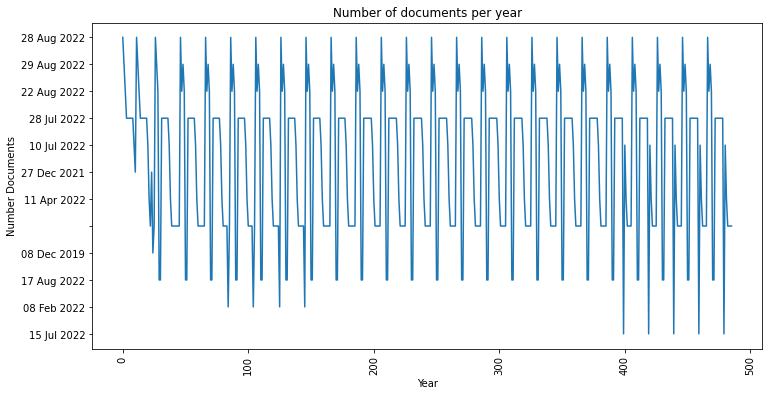

<Figure size 432x288 with 0 Axes>

In [91]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.lineplot(data = property_df4['Date_updated'], ax = ax)
g.set(title = "Number of documents per year",
     xlabel = "Year", 
     ylabel = "Number Documents")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

# I am sorry I wasn't able to complete this project. It was due to issues beyond my control. 